In [4]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [5]:
model_df = pd.read_csv(Path('Resources/model1.csv'))
model_df.head()

,show_id,followers,mood-good,mood-fun,mood-wow,mood-sad,mood-so-so,mood-bad
0,288128,230,2.250000,7.750000,1.000000,0.000000,0.000000,0.000000
1,313803,1298,7.757576,23.878788,7.272727,0.606061,0.181818,0.030303
2,325462,270,6.400000,0.200000,6.900000,0.900000,0.200000,0.200000
3,325198,900,17.583333,4.250000,2.666667,0.000000,1.333333,0.250000
4,349743,7123,243.500000,18.000000,45.833333,0.166667,15.500000,2.666667


In [3]:
model_df.shape

(17864, 8)

In [6]:
model_df = model_df.drop(["show_id"],axis = 1)

In [5]:
model_df.head()

,followers,mood-good,mood-fun,mood-wow,mood-sad,mood-so-so,mood-bad
0,230,2.250000,7.750000,1.000000,0.000000,0.000000,0.000000
1,1298,7.757576,23.878788,7.272727,0.606061,0.181818,0.030303
2,270,6.400000,0.200000,6.900000,0.900000,0.200000,0.200000
3,900,17.583333,4.250000,2.666667,0.000000,1.333333,0.250000
4,7123,243.500000,18.000000,45.833333,0.166667,15.500000,2.666667


In [7]:
# split the data into train and test set
train, test = train_test_split(model_df, random_state=42, shuffle=True)

In [8]:
train.shape

(13398, 7)

In [9]:
test.shape

(4466, 7)

In [10]:
y_train = train["followers"]  # define label
X_train = train.drop(columns=["followers"])  # drop label from features

In [27]:
y_test = test["followers"]  # define label
X_test = test.drop(columns=["followers"])  # drop label from features

mood-good


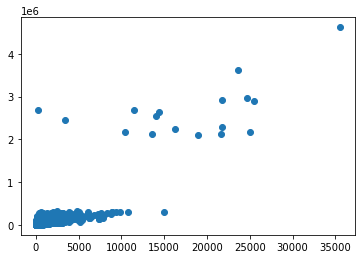

mood-fun


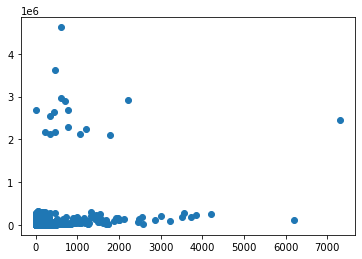

mood-wow


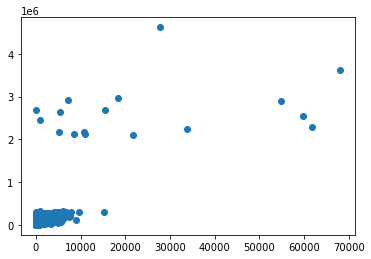

mood-sad


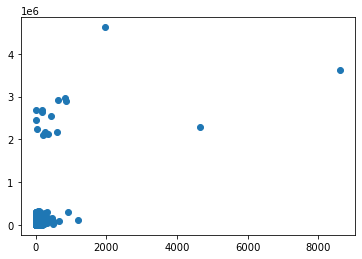

mood-so-so


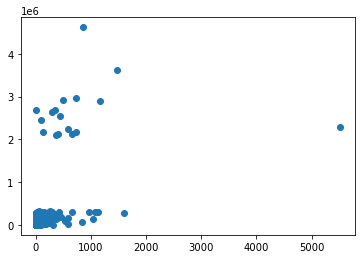

mood-bad


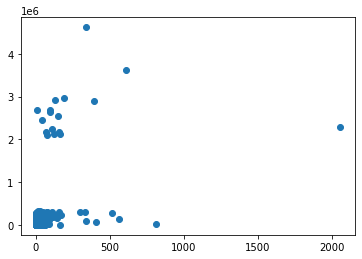

In [11]:
from matplotlib import pyplot as plt
for col in X_train.columns:
    print(col)
    plt.scatter(X_train[col], y_train)
    plt.show()

[  83.26143485   71.83227666   24.51431862   86.32275568 -831.66262596
 1302.81682393]


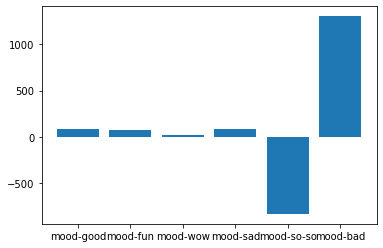

In [13]:
reg = LinearRegression().fit(X_train, y_train)
print(reg.coef_)
plt.bar(X_train.columns, reg.coef_)
plt.show()

[  83.261298     71.8321467    24.51432668   86.32296026 -831.65103935
 1302.78750794]


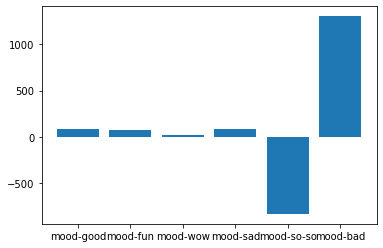

In [15]:
reg = Lasso().fit(X_train, y_train)
print(reg.coef_)
plt.bar(X_train.columns, reg.coef_)
plt.show()

[  83.26029048   71.83150275   24.51431544   86.32701507 -831.56283928
 1302.55794235]


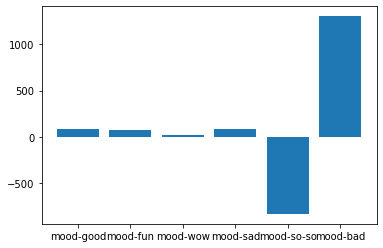

In [16]:
reg = Ridge(alpha=100).fit(X_train, y_train)
print(reg.coef_)
plt.bar(X_train.columns, reg.coef_)
plt.show()

[  82.57575953   71.36715235   24.51191563   88.83374562 -771.98634416
 1148.25311726]


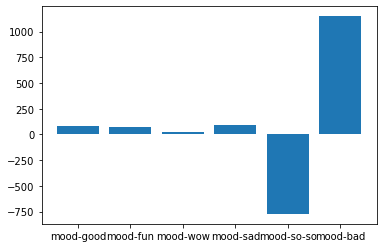

In [17]:
from sklearn.linear_model import ElasticNet
reg = ElasticNet(alpha=10).fit(X_train, y_train)
print(reg.coef_)
plt.bar(X_train.columns, reg.coef_)
plt.show()

In [18]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.svm import SVR

In [28]:
def test_model(model, data):
    X_train, X_test, y_train, y_test = data
    reg = model.fit(X_train, y_train)
    print(f'Model: {type(reg).__name__}')
    print(f'Train score: {reg.score(X_train, y_train)}')
    print(f'Test Score: {reg.score(X_test, y_test)}\n')
    plt.show()

In [29]:
data = [X_train, X_test, y_train, y_test]
test_model(LinearRegression(), data)

test_model(KNeighborsRegressor(), data)
test_model(RandomForestRegressor(), data)
test_model(ExtraTreesRegressor(), data)
test_model(AdaBoostRegressor(), data)
test_model(SVR(C=1.0, epsilon=0.2), data)

Model: LinearRegression
Train score: 0.7772372274898088
Test Score: 0.7697841768858507

Model: KNeighborsRegressor
Train score: 0.8100691998001655
Test Score: 0.7775276476526162

Model: RandomForestRegressor
Train score: 0.9591374633111239
Test Score: 0.863688156532394

Model: ExtraTreesRegressor
Train score: 0.9999999999999889
Test Score: 0.818629574957093

Model: AdaBoostRegressor
Train score: 0.9230473998575159
Test Score: 0.753374645352133

Model: SVR
Train score: -0.009897137609577333
Test Score: -0.010512093227406094



In [34]:
# Scale the data
stdscaler = StandardScaler().fit(X_train)
X_train_std = stdscaler.transform(X_train)
X_test_std = stdscaler.transform(X_test)

In [30]:
mmscaler = MinMaxScaler().fit(X_train) 
X_train_mm = mmscaler.transform(X_train)
X_test_mm = mmscaler.transform(X_test)

In [57]:
X_train_mm

array([[7.87215618e-04, 1.02552759e-04, 3.23193057e-04, 1.74102479e-04,
        1.13230193e-05, 9.72668028e-05],
       [3.87984840e-03, 1.17821726e-03, 5.73912519e-04, 2.94039743e-04,
        3.07231258e-04, 5.83600817e-04],
       [8.33713244e-03, 1.04393450e-03, 6.03444379e-04, 1.51781649e-04,
        1.85087816e-03, 9.20293596e-04],
       ...,
       [3.61659123e-04, 1.79311946e-03, 3.47232210e-05, 1.26619985e-04,
        1.43081790e-04, 2.07797261e-04],
       [2.35732149e-04, 2.23512424e-04, 1.13004565e-06, 1.16068320e-04,
        2.52590431e-05, 1.15971957e-04],
       [1.03087760e-04, 3.41842531e-05, 0.00000000e+00, 1.16068320e-04,
        1.92491328e-04, 5.83600817e-04]])

In [58]:
data = [X_train_mm, X_test_mm, y_train, y_test]
test_model(LinearRegression(), data)

test_model(KNeighborsRegressor(), data)
test_model(RandomForestRegressor(), data)
test_model(ExtraTreesRegressor(), data)
test_model(AdaBoostRegressor(), data)
test_model(SVR(C=1.0, epsilon=0.2), data)

Model: LinearRegression
Train score: 0.7772372274898088
Test Score: 0.7697841768858505

Model: KNeighborsRegressor
Train score: 0.8472565456518144
Test Score: 0.7958385992088967

Model: RandomForestRegressor
Train score: 0.9593025305268028
Test Score: 0.8534117591481185

Model: ExtraTreesRegressor
Train score: 0.9999999781040916
Test Score: 0.8370641619100623

Model: AdaBoostRegressor
Train score: 0.7049221040617547
Test Score: 0.47928140447874745

Model: SVR
Train score: -0.00973287988032201
Test Score: -0.010342083890608533



In [35]:
data = [X_train_std, X_test_std, y_train, y_test]
test_model(LinearRegression(), data)

test_model(KNeighborsRegressor(), data)
test_model(RandomForestRegressor(), data)
test_model(ExtraTreesRegressor(), data)
test_model(AdaBoostRegressor(), data)
test_model(SVR(C=1.0, epsilon=0.2), data)

Model: LinearRegression
Train score: 0.7772372274898088
Test Score: 0.7697841768858505

Model: KNeighborsRegressor
Train score: 0.8548172873940769
Test Score: 0.8207462039041484

Model: RandomForestRegressor
Train score: 0.9592118173477517
Test Score: 0.864379266642447

Model: ExtraTreesRegressor
Train score: 0.9999999999999932
Test Score: 0.8363895774358273

Model: AdaBoostRegressor
Train score: 0.9449146505416931
Test Score: 0.7319299679124551

Model: SVR
Train score: -0.00987040098299774
Test Score: -0.010509403162860975



In [65]:
model = RandomForestRegressor()
model.fit(X_train_mm, y_train)

RandomForestRegressor()

In [66]:
print(f"Random Forest Training Data Score: {model.score(X_train_mm, y_train)}")
print(f"Random Forest Testing Data Score: {model.score(X_test_mm, y_test)}")

Random Forest Training Data Score: 0.9560132261746497
Random Forest Testing Data Score: 0.8569088708501147


In [67]:
predictions = model.predict(X_test_mm)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
5924,480.58,1365
13186,853.59,1230
9055,5242.02,26107
17292,6450.01,1278
17626,1482.32,1840
...,...,...
7524,409.19,673
8953,2091.19,792
13078,8497.12,2021
10564,13333.67,972


In [76]:
type(predictions)

numpy.ndarray

In [69]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

mean squared error (MSE): 1233757999.0330496
R-squared (R2 ): 0.8569088708501147


In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [72]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictions)
accuracy = (tp + tn) / (tp + fp + tn + fn) # (111 + 128) / (111 + 5 + 128 + 6)
print(f"Accuracy: {accuracy}")

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [74]:
#testing with sample data
test_data = [[0.1,0.99,0.45,0.23,0.0,0]]
predicted = model.predict(test_data)
print(predicted)

[1693342.83]


In [78]:
# Save the model
import joblib
joblib.dump(model,"showsuccess_predictor.h5")

['showsuccess_predictor.h5']